# Assignment: Global average budgets in the CESM pre-industrial control simulation

This notebook is part of [The Climate Laboratory](https://brian-rose.github.io/ClimateLaboratoryBook) by [Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany.

## Learning goals

Students completing this assignment will gain the following skills and concepts:

- Continued practice working with the Jupyter notebook
- Familiarity with atmospheric output from the CESM simulation
- More complete comparison of the global energy budget in the CESM control simulation to the observations
- Validation of the annual cycle of surface temperature against observations
- Opportunity to formulate a hypothesis about these global temperature variations
- Python programming skills: basic xarray usage: opening gridded dataset and taking averages

## Instructions

- In a local copy of this notebook (on the JupyterHub or your own device) **add your answers in additional cells**.
- **Complete the required problems** below. 
- Remember to set your cell types to `Markdown` for text, and `Code` for Python code!
- **Include comments** in your code to explain your method as necessary.
- Remember to actually answer the questions. **Written answers are required** (not just code and figures!)
- Submit your solutions in **a single Jupyter notebook** that contains your text, your code, and your figures.
- *Make sure that your notebook* ***runs cleanly without errors:***
    - Save your notebook
    - From the `Kernel` menu, select `Restart & Run All`
    - Did the notebook run from start to finish without error and produce the expected output?
    - If yes, save again and submit your notebook file
    - If no, fix the errors and try again.

## Problem 1: The global energy budget in the CESM control simulation

Compute the **global, time average** of each of the following quantities, and compare them to the observed values from the Trenberth and Fasullo (2012) figure in the course notes:

- Solar Radiation budget:
    - Incoming Solar Radiation, or Insolation
    - Reflected Solar Radiation at the top of atmosphere
    - Solar Radiation Reflected by Surface
    - Solar Radiation Absorbed by Surface
    - Solar Radiation Refelected by Clouds and Atmosphere *(you can calculate this as the difference between the reflected radiation at the top of atmosphere and reflected radiation at the surface)*
    - Total Absorbed Solar Radiation (ASR) at the top of atmosphere
    - Solar Radiation Absorbed by Atmosphere *(you can calculate this as the residual of your budget, i.e. what's left over after accounting for all other absorption and reflection)*
- Longwave Radiation budget:
    - Outgoing Longwave Radiation
    - Upward emission from the surface
    - Downwelling radiation at the surface
- Other surface fluxes:
    - "Thermals", or *sensible heat flux*. *You will find this in the field called `SHFLX` in your dataset.*
    - "Evapotranspiration", or *latent heat flux*. *You will find this in the field called `LHFLX` in your dataset.*
    
*Note we will look more carefully at atmospheric absorption and emission processes later. You do not need to try to calculate terms such as "Emitted by Atmosphere" or "Atmospheric Window"*

**Based on your results above, answer the following questions:**

- Is the CESM control simulation at (or near) **energy balance**? 
- Do you think this simulation is near equilibrium?
- Summarize in your own words what you think are the most important similarities and differences of the global energy budgets in the CESM simulation and the observations.

In [1]:
# start by copy pasting code from "introducing-cesm" and the "hints" notebook to get the data
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr


cesm_data_path = "http://thredds.atmos.albany.edu:8080/thredds/dodsC/CESMA/"
atm_control = xr.open_dataset(cesm_data_path + "cpl_1850_f19/concatenated/cpl_1850_f19.cam.h0.nc")
# helpful to click around the xarray output, the paper icon on RHS tells you the long name of each variable
atm_control

<xarray.Dataset>
Dimensions:       (ilev: 27, lat: 96, lev: 26, lon: 144, nbnd: 2, slat: 95, slon: 144, time: 240)
Coordinates:
  * lev           (lev) float64 3.545 7.389 13.97 23.94 ... 929.6 970.6 992.6
  * ilev          (ilev) float64 2.194 4.895 9.882 18.05 ... 956.0 985.1 1e+03
  * time          (time) object 0001-02-01 00:00:00 ... 0021-01-01 00:00:00
  * lat           (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon           (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * slat          (slat) float64 -89.05 -87.16 -85.26 ... 85.26 87.16 89.05
  * slon          (slon) float64 -1.25 1.25 3.75 6.25 ... 351.2 353.8 356.2
Dimensions without coordinates: nbnd
Data variables:
    hyam          (lev) float64 ...
    hybm          (lev) float64 ...
    hyai          (ilev) float64 ...
    hybi          (ilev) float64 ...
    P0            float64 ...
    date          (time) int32 ...
    datesec       (time) int32 ...
    w_stag        (slat) float64 ...
    time_bnds     (time, nbnd) object ...
    date_written  (time) |S64 ...
    time_written  (time) |S64 ...
    ntrm          int32 ...
    ntrn          int32 ...
    ntrk          int32 ...
    ndbase        int32 ...
    nsbase        int32 ...
    nbdate        int32 ...
    nbsec         int32 ...
    mdt           int32 ...
    nlon          (lat) int32 ...
    wnummax       (lat) int32 ...
    gw            (lat) float64 ...
    ndcur         (time) int32 ...
    nscur         (time) int32 ...
    co2vmr        (time) float64 ...
    ch4vmr        (time) float64 ...
    n2ovmr        (time) float64 ...
    f11vmr        (time) float64 ...
    f12vmr        (time) float64 ...
    sol_tsi       (time) float64 ...
    nsteph        (time) int32 ...
    AEROD_v       (time, lat, lon) float32 ...
    CLDHGH        (time, lat, lon) float32 ...
    CLDICE        (time, lev, lat, lon) float32 ...
    CLDLIQ        (time, lev, lat, lon) float32 ...
    CLDLOW        (time, lat, lon) float32 ...
    CLDMED        (time, lat, lon) float32 ...
    CLDTOT        (time, lat, lon) float32 ...
    CLOUD         (time, lev, lat, lon) float32 ...
    CONCLD        (time, lev, lat, lon) float32 ...
    DCQ           (time, lev, lat, lon) float32 ...
    DTCOND        (time, lev, lat, lon) float32 ...
    DTV           (time, lev, lat, lon) float32 ...
    EMIS          (time, lev, lat, lon) float32 ...
    FICE          (time, lev, lat, lon) float32 ...
    FLDS          (time, lat, lon) float32 ...
    FLDSC         (time, lat, lon) float32 ...
    FLNS          (time, lat, lon) float32 ...
    FLNSC         (time, lat, lon) float32 ...
    FLNT          (time, lat, lon) float32 ...
    FLNTC         (time, lat, lon) float32 ...
    FLUT          (time, lat, lon) float32 ...
    FLUTC         (time, lat, lon) float32 ...
    FSDS          (time, lat, lon) float32 ...
    FSDSC         (time, lat, lon) float32 ...
    FSDTOA        (time, lat, lon) float32 ...
    FSNS          (time, lat, lon) float32 ...
    FSNSC         (time, lat, lon) float32 ...
    FSNT          (time, lat, lon) float32 ...
    FSNTC         (time, lat, lon) float32 ...
    FSNTOA        (time, lat, lon) float32 ...
    FSNTOAC       (time, lat, lon) float32 ...
    FSUTOA        (time, lat, lon) float32 ...
    ICEFRAC       (time, lat, lon) float32 ...
    ICIMR         (time, lev, lat, lon) float32 ...
    ICWMR         (time, lev, lat, lon) float32 ...
    LANDFRAC      (time, lat, lon) float32 ...
    LHFLX         (time, lat, lon) float32 ...
    LWCF          (time, lat, lon) float32 ...
    MSKtem        (time, lat, lon) float32 ...
    OCNFRAC       (time, lat, lon) float32 ...
    OMEGA         (time, lev, lat, lon) float32 ...
    OMEGAT        (time, lev, lat, lon) float32 ...
    PBLH          (time, lat, lon) float32 ...
    PHIS          (time, lat, lon) float32 ...
    PRECC         (time, lat, lon) float32 ...
    PRECL         (time, lat, lon) float32 ..

Since we are doing the same computation numerous times, define a function that computes the global time average of whatever variable we wish to pass in:

In [2]:
# copy from method 2 of weighting each point by latittude
weight_factor2 = atm_control.gw / atm_control.gw.mean(dim='lat')

def glob_time_avg(var):
    '''
    returns the weighted global time average of a variable var=xarray_object.attribute 
    ex:
    atm_control.SOLIN
    '''
    return (var * weight_factor2).mean(dim=('time', 'lon', 'lat'))

# check this works by calculating SOLIN=340.3 as in the example
print(glob_time_avg(atm_control.SOLIN))

<xarray.DataArray ()>
array(340.30586262)


Now go through the list and use the function to calculate each global time average, with the figure as a reference

![Observed global energy budget](http://www.atmos.albany.edu/facstaff/brose/classes/ENV415_Spring2018/images/GlobalEnergyBudget.png)

**Solar Radiation budget:**

In [3]:
# Incoming Solar Radiation, or Insolation y
insolation = glob_time_avg(atm_control.SOLIN)

# Reflected Solar Radiation at the top of atmosphere y
solar_refl_top = -glob_time_avg(atm_control.FSUTOA)

# Solar Radiation Reflected by Surface
solar_refl_surf = glob_time_avg(atm_control.FSNS) - glob_time_avg(
    atm_control.FSDS
)  # net = upwelling - downwelling (from the hints)

# Solar Radiation Absorbed by Surface
solar_abs_surf = glob_time_avg(atm_control.FSDS) + solar_refl_surf  # right?

# Solar Radiation Refelected by Clouds and Atmosphere *(you can calculate this as the difference between the reflected radiation at the top of atmosphere and reflected radiation at the surface)*
solar_refl_clouds = solar_refl_top - solar_refl_surf

# Total Absorbed Solar Radiation (ASR) at the top of atmosphere
solar_abs_top = insolation + solar_refl_top

# Solar Radiation Absorbed by Atmosphere *(you can calculate this as the residual of your budget, i.e. what's left over after accounting for all other absorption and reflection)*
solar_abs_atm = insolation + solar_refl_top - solar_abs_surf

## store these values in a dictionary so we can print them with a for loop, comparing with Trenberth and Fasullo
## what is a dictionary? --> https://phaustin.github.io/think_jupyter/dictionaries.html
solar_calcs = {
    "Incoming Solar Radiation": insolation,
    "Reflected Solar Radiation": solar_refl_top,
    "Reflected by Surface": solar_refl_surf,
    "Absorbed by Surface": solar_abs_surf,
    "Reflected by Clouds": solar_refl_clouds,
    "Total Absorbed at TOA": solar_abs_top,
    "Absorbed by Atmosphere": solar_abs_atm,
}

for key in solar_calcs:
    print(key + ": " + str(solar_calcs[key].values))

Incoming Solar Radiation: 340.3058626199453
Reflected Solar Radiation: -102.90525255843495
Reflected by Surface: -24.572090133962092
Absorbed by Surface: 161.37855219049865
Reflected by Clouds: -78.33316242447286
Total Absorbed at TOA: 237.40061006151035
Absorbed by Atmosphere: 76.0220578710117


**Longwave Radiation Budget:**

In [4]:
# Outgoing Longwave Radiation
lw_out = -glob_time_avg(atm_control.FLUT)

# Downwelling radiation at the surface
lw_dn_surf = glob_time_avg(atm_control.FLDS)

# Upward emission from the surface
lw_up_surf = -glob_time_avg(atm_control.FLNS) - lw_dn_surf

lw_calcs = {
    "Outgoing Longwave Radiation": lw_out,
    "Surface Radiation": lw_up_surf,
    "Absorbed by Surface": lw_dn_surf,
}

for key in lw_calcs:
    print(key + ": " + str(lw_calcs[key].values))

Outgoing Longwave Radiation: -235.37275112552027
Surface Radiation: -395.45138072029425
Absorbed by Surface: 335.27658225136815


**Other surface fluxes:**

In [5]:
# "Thermals", or *sensible heat flux*. *You will find this in the field called `SHFLX` in your dataset.*
thermals = -glob_time_avg(atm_control.SHFLX)

# "Evapotranspiration", or *latent heat flux*. *You will find this in the field called `LHFLX` in your dataset.*
evaptrs = -glob_time_avg(atm_control.LHFLX)

other_calcs = {"Thermals": thermals, "Evapotranspiration": evaptrs}

for key in other_calcs:
    print(key + ": " + str(other_calcs[key].values))

Thermals: -17.533986274205628
Evapotranspiration: -83.00078522655211


**Analysis:**

Is the CESM control simulation at (or near) **energy balance**? 

*The figure has a net 0.9W/m$^2$ at the surface, which we can calculate for our model by adding all upward fluxes to all downward fluxes (note how we kept the sign convention + for incoming radiation, so we can just add the surface fluxes)*

In [6]:
net_surf_abs = solar_abs_surf + thermals + evaptrs + lw_up_surf + lw_dn_surf
print(f"Net absorbed energy:  {net_surf_abs.values} W/m2")

Net absorbed energy:  0.6689822208148257 W/m2


*This simulation is closer to equilibrium than the figure, with 0.7W/m$^2$ instead of 0.9, close to energy balance but slowly rising in temperature.*

Do you think this simulation is near equilibrium?

*The net absorbed energy is less than 1\% of the incoming radiation, so the system only needs to warm a small amount to reach equilibrium (see ```assignment-0-Dim-ebm.ipynb```), but we need to consider what secondary effects a small amount of warming might cause.*

Summarize in your own words what you think are the most important similarities and differences of the global energy budgets in the CESM simulation and the observations.

***Similarities***
- *close to equilibrium, ie energy in $\approx$ energy out, with a small residual causing the planet to warm*

***Differences***
- *model values are order 1 W/m$^2$ different between the model and the measured values. Sources of error could be from discretization, (the model is fairly low resolution) or variance between model runs. 

## Problem 2: Verifying the annual cycle in global mean surface temperature against observations

In the class notes we plotted the **timeseries of global mean surface temperature** in the CESM control simulation, and found an **annual cycle**. The purpose of this exercise is to verify that this phenomenon is also found in the observed temperature record. If so, then we can conclude that it is a real feature of Earth's climate and not an artifact of the numerical model.

For observations, we will use the **NCEP Reanalysis data**.

*Reanalysis data is really a blend of observations and output from numerical weather prediction models. It represents our “best guess” at conditions over the whole globe, including regions where observations are very sparse.*

The necessary data are all served up over the internet. We will look at monthly climatologies averaged over the 30 year period 1981 - 2010.

You can browse the available data here: 
https://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.derived.html

**Surface air temperature** is contained in a file called `air.2m.mon.ltm.nc`, which is found in the collection called `Surface Fluxes`. 

Here's a link directly to the catalog page for this data file:
https://www.esrl.noaa.gov/psd/thredds/catalog/Datasets/ncep.reanalysis.derived/surface_gauss/catalog.html?dataset=Datasets/ncep.reanalysis.derived/surface_gauss/air.2m.day.ltm.nc

Now click on the `OPeNDAP` link. A page opens up with lots of information about the contents of the file. The `Data URL` is what we need to read the data into our Python session. For example, this code opens the file and displays a list of the variables it contains:

In [7]:
import xarray as xr
url = "http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface_gauss/air.2m.mon.ltm.nc"
ncep_air2m = xr.open_dataset(url)

print(ncep_air2m)

<xarray.Dataset>
Dimensions:             (lat: 94, lon: 192, nbnds: 2, time: 12)
Coordinates:
  * lon                 (lon) float32 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
  * time                (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:0...
  * lat                 (lat) float32 88.54 86.65 84.75 ... -84.75 -86.65 -88.54
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] ...
    air                 (time, lat, lon) float32 ...
    valid_yr_count      (time, lat, lon) float32 ...
Attributes:
    Conventions:                    COARDS
    title:                          mean daily NMC reanalysis (1958)
    description:                    Data is from NMC initialized reanalysis\n...
    platform:                       Model
    not_missing_threshold_percent:  minimum 3% values input to have non-missi...
    history:                        Created 2011/07/12 by doMonthLTM\nConvert...
    dataset_title:                  N

C:\Users\Owner\mini37\envs\climlab-courseware\lib\site-packages\xarray\coding\times.py:463: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
C:\Users\Owner\mini37\envs\climlab-courseware\lib\site-packages\xarray\coding\times.py:83: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)
C:\Users\Owner\mini37\envs\climlab-courseware\lib\site-packages\numpy\core\_asarray.py:83: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.dat

The temperature data is called `air`. Take a look at the details:

In [8]:
print(ncep_air2m.air)

<xarray.DataArray 'air' (time: 12, lat: 94, lon: 192)>
[216576 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
Attributes:
    long_name:     Monthly Long Term Mean of Air Temperature
    valid_range:   [150. 400.]
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    level_desc:    2 m
    statistic:     Long Term Mean
    parent_stat:   Mean
    actual_range:  [198.33992 311.8952 ]
    dataset:       NCEP Reanalysis Derived Products
    _ChunkSizes:   [  1  94 192]


Notice that the dimensions are `(time: 12, lat: 94, lon: 192)`. The time dimension is calendar months. But note that the lat/lon grid is not the same as our model output! 

*Think about how you will handle calculating the global average of these data.*

### Your task:

- Make a well-labeled timeseries graph of the global-averaged observed average surface air temperature climatology. 
- Verify that the annual cycle we found in the CESM simulation also exists in the observations.
- In your own words, suggest a plausible physical explanation for why this annual cycle exists. 

In [28]:
# use the same notation as above but modify to average over only the spatial terms for both model and observed temps
glob_avg_obs = ncep_air2m.air.mean(dim=('lat','lon'))
glob_avg_mod = atm_control.TS.mean(dim=('lat','lon'))[0:12] # grab just the first 12 months by slicing

# what do our new arrays look like?
glob_avg_obs

<xarray.DataArray 'air' (time: 12)>
array([277.0803 , 276.31418, 275.96228, 277.00696, 278.82495, 280.16296,
       280.44324, 280.10062, 278.8947 , 277.84683, 277.53674, 277.47675],
      dtype=float32)
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00

In [29]:
# 1x12 array, with 12 points (months) in time. good! How about the model?
glob_avg_mod

<xarray.DataArray 'TS' (time: 12)>
array([275.40372, 273.83316, 274.24368, 275.82712, 277.64557, 279.41193,
       279.71957, 279.25818, 278.00882, 276.38968, 275.21945, 274.98138],
      dtype=float32)
Coordinates:
  * time     (time) object 0001-02-01 00:00:00 ... 0002-01-01 00:00:00

In [31]:
# Now copy/paste/modify code from introducing-cesm to make a pretty plot
glob_avg_obs.plot()

# !!! this happens because of the error listed in ln[7]

ValueError: invalid year provided in cftime.datetime(0, 1, 1, 0, 0, 0, 0, calendar='gregorian')

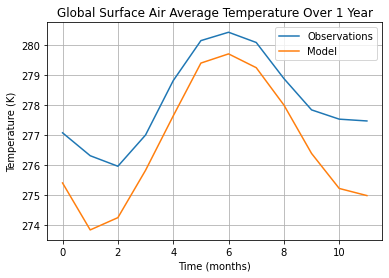

In [35]:
# workaround:
plt.plot(glob_avg_obs, label="Observations")
plt.plot(glob_avg_mod, label="Model")

# make the plot pretty
plt.xlabel("Time (months)")
plt.ylabel("Temperature (K)")
plt.title("Global Surface Air Average Temperature Over 1 Year")
plt.grid()
plt.legend()

*The same trend is readily apparent in both the observations and the model, so we can conclude it is a real effect and not a model artifact.*

In your own words, suggest a plausible physical explanation for why this annual cycle exists. 

*From the plot, we observe the maximum global average surface temperature occurs during northern-hemisphere summer, when the northern hemisphere is angled toward the sun. Land heats up and cools off much faster than water, and the the northern hemisphere has far more land surface area than the southern hemisphere.*

____________

## Credits

This notebook is part of [The Climate Laboratory](https://brian-rose.github.io/ClimateLaboratoryBook), an open-source textbook developed and maintained by [Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany.

It is licensed for free and open consumption under the
[Creative Commons Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/) license.

Development of these notes and the [climlab software](https://github.com/brian-rose/climlab) is partially supported by the National Science Foundation under award AGS-1455071 to Brian Rose. Any opinions, findings, conclusions or recommendations expressed here are mine and do not necessarily reflect the views of the National Science Foundation.
____________